In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=sns.load_dataset("titanic")
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


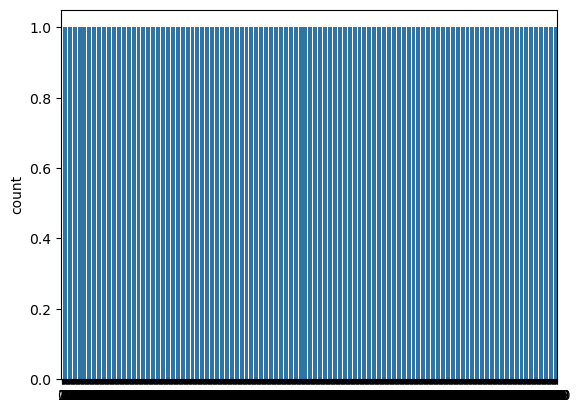

In [5]:
sns.countplot(dataset['survived'])
plt.show()

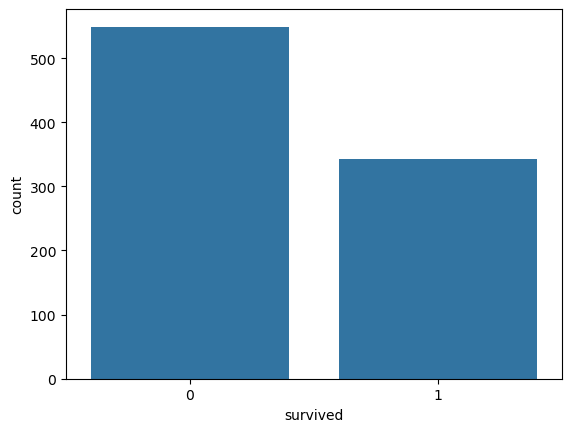

In [6]:
sns.countplot(x=dataset['survived'])
plt.show()

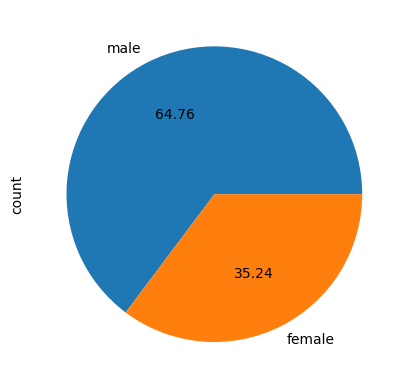

In [8]:
dataset['sex'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

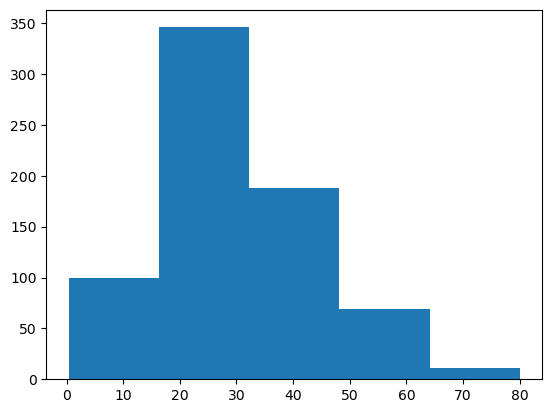

In [9]:
plt.hist(dataset['age'], bins=5)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3264\4239607121.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


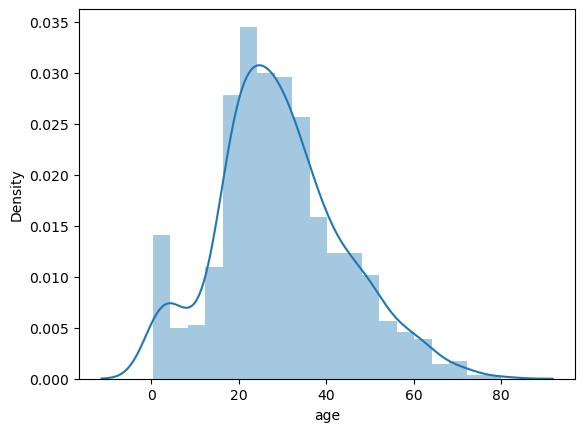

In [10]:
sns.distplot(dataset['age'])
plt.show()

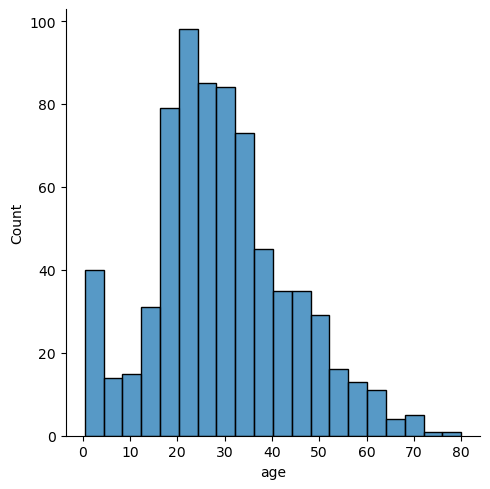

In [11]:
sns.displot(dataset['age'])
plt.show()

<Axes: xlabel='sex', ylabel='survived'>

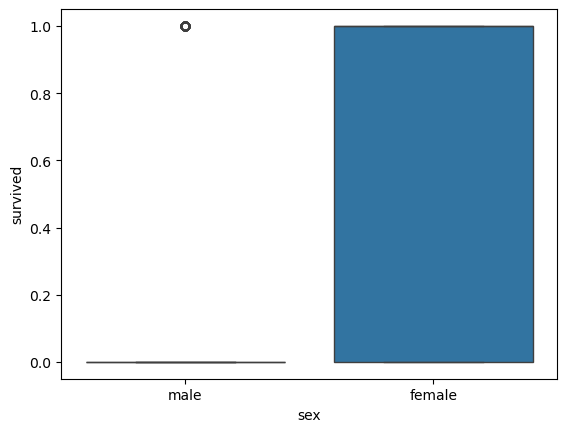

In [12]:
sns.boxplot(x=dataset['sex'],y=dataset['survived'])

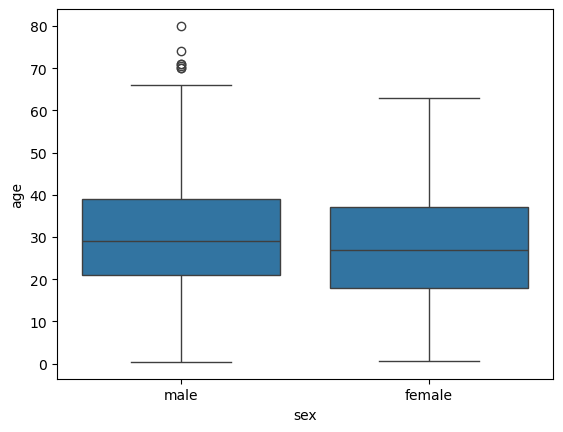

In [13]:
sns.boxplot(x='sex', y='age', data=dataset)
plt.show()

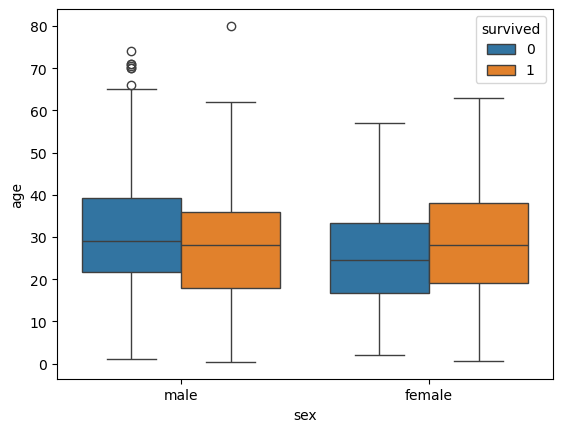

In [14]:
sns.boxplot(x='sex', y='age', data=dataset, hue="survived")
plt.show()

                   25%   50%    75%   IQR
sex    survived                          
female 0         16.75  24.5  33.25  16.5
       1         19.00  28.0  38.00  19.0
male   0         21.75  29.0  39.25  17.5
       1         18.00  28.0  36.00  18.0


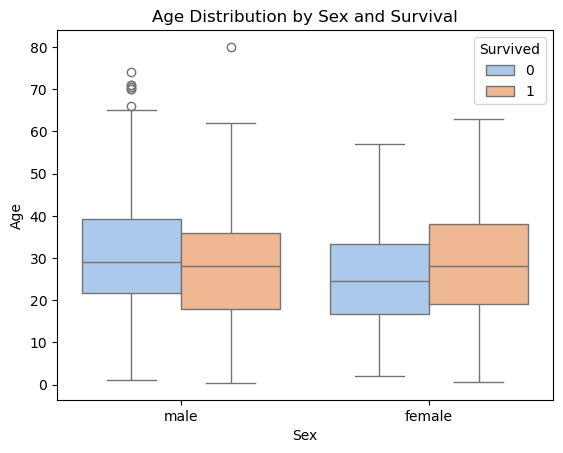

In [6]:
def compute_iqr(df, group_cols):
    summary = df.groupby(group_cols)['age'].describe()
    summary['IQR'] = summary['75%'] - summary['25%']  # Q3 - Q1
    return summary[['25%', '50%', '75%', 'IQR']]
iqr_values = compute_iqr(dataset, ['sex', 'survived'])
print(iqr_values)
sns.boxplot(x='sex', y='age', data=dataset, hue="survived", palette="pastel")
plt.title("Age Distribution by Sex and Survival")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.legend(title="Survived")
plt.show()

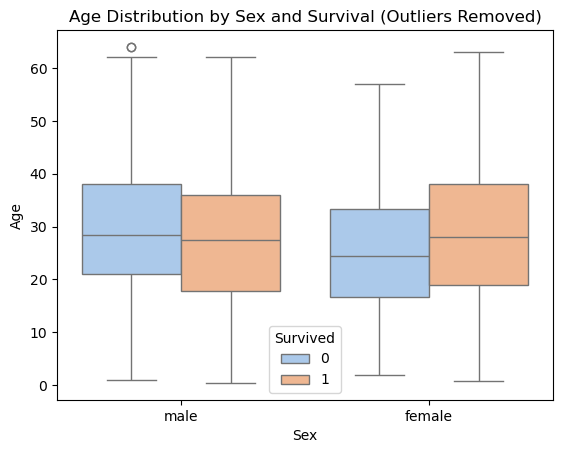

In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df
# Remove outliers from the dataset
cleaned_dataset = remove_outliers(dataset, 'age')
# Plot boxplot after removing outliers
sns.boxplot(x='sex', y='age', data=cleaned_dataset, hue="survived", palette="pastel")
plt.title("Age Distribution by Sex and Survival (Outliers Removed)")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.legend(title="Survived")
plt.show()